# Capstone Project

TMDB Dataset found at:
https://www.kaggle.com/tmdb/tmdb-movie-metadata

This Dataset from The Movie Database contains information on over 14,000 films.  Features include numeric variables like budget and revenue, as well as categorical variables like genres and language.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

In [2]:
movies = pd.read_csv('~/Desktop/Data_Science/tmdb/tmdb_5000_movies.csv')

In [3]:
#create method to extract year from release date
def ExtractYear(val):
    tokens = val.split('-')
    return tokens[0]

#streamline release date data to string
movies['release_date'] = movies['release_date'].astype(str)

#apply year extraction method to release date
movies['release_year'] = movies['release_date'].apply(ExtractYear)

#turn release year data into numbers
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='integer')

In [4]:
import ast

def ExtractGenreAsList(dictionary_genre):
    dictionary_genre = ast.literal_eval(dictionary_genre)
    list_genres = []
    for entry in dictionary_genre:
        list_genres.append(entry['name'])
    return list_genres

In [5]:
movies["genre_list"] = movies["genres"].apply(ExtractGenreAsList)

In [6]:
unique_genres = []
for row in movies["genre_list"]:
    for genres in row:
        unique_genres.append(genres)
unique_genres = set(unique_genres)       
print(unique_genres)

{'Horror', 'Mystery', 'Documentary', 'Comedy', 'Romance', 'TV Movie', 'War', 'Drama', 'Music', 'Science Fiction', 'Crime', 'Thriller', 'Adventure', 'Animation', 'Family', 'Western', 'Fantasy', 'Foreign', 'History', 'Action'}


In [7]:
genre_list = []
for genre in unique_genres:
    genre_list.append(genre)
genre_list.sort()
print(genre_list)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [8]:
def GetGenrePerRow(row, genre):
    if genre in row:
        return 1
    else:
        return 0

In [9]:
for genre in genre_list:
    movies[genre] = movies["genre_list"].apply(lambda x: GetGenrePerRow(x, genre))

In [10]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,0,0,0,0,1,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,1,0,0,0,0


In [11]:
movies.drop(['homepage', 'id', 'overview'], axis=1)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,...,0,0,0,0,0,0,0,1,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,...,0,0,0,0,0,1,0,0,0,0
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,...,0,0,0,0,0,0,0,0,0,0
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,...,0,0,0,0,0,0,0,0,0,0
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,...,0,0,0,0,0,1,0,0,0,0
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,...,0,0,0,0,0,0,0,0,0,0
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,...,0,0,0,0,0,0,0,0,0,0


## Question 1: Is one genre more popular than another?

In [12]:
print(genre_list)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [13]:
genre_count = pd.DataFrame(index = genre_list)
total_list = []
for genre in genre_list:
    total = movies[genre].sum()
    print(genre, total)
    total_list.append(total)

Action 1154
Adventure 790
Animation 234
Comedy 1722
Crime 696
Documentary 110
Drama 2297
Family 513
Fantasy 424
Foreign 34
History 197
Horror 519
Music 185
Mystery 348
Romance 894
Science Fiction 535
TV Movie 8
Thriller 1274
War 144
Western 82


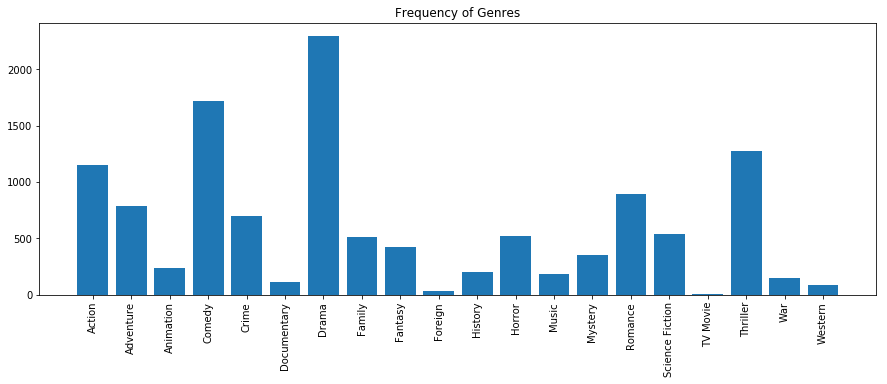

In [14]:
plt.figure(figsize=(15, 5))
plt.bar(genre_list, total_list)
plt.xticks(rotation = 90)
plt.title('Frequency of Genres')
plt.show()

The most commonly occurring genre is Drama, followed by Comedy, Thriller and Action.  The least common is TV Movie (should that one even count?), followed by Foreign, Western, Documentary and War.

## Question 2: How has frequency changed over time for these most common genres?

In [27]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'genre_list', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [33]:
genre_info = movies.iloc[:, 20:]

In [34]:
genre_info.head()

,release_year,genre_list,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2009.0,"[Action, Adventure, Fantasy, Science Fiction]",1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2007.0,"[Adventure, Fantasy, Action]",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015.0,"[Action, Adventure, Crime]",1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012.0,"[Action, Crime, Drama, Thriller]",1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2012.0,"[Action, Adventure, Science Fiction]",1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
genre_info.describe()

,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,4802.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2002.468763,0.240267,0.164481,0.048720,0.358526,0.144909,0.022902,0.478243,0.106808,0.088278,...,0.041016,0.108057,0.038518,0.072455,0.186134,0.111389,0.001666,0.265251,0.029981,0.017073
std,12.414354,0.427290,0.370750,0.215304,0.479618,0.352046,0.149608,0.499578,0.308901,0.283729,...,0.198348,0.310485,0.192462,0.259266,0.389255,0.314646,0.040782,0.441513,0.170553,0.129556
min,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
genre_agg = genre_info.groupby('release_year').aggregate(np.sum)

In [70]:
genre_agg.shape

(90, 20)

In [74]:
genre_agg.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1916.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1925.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1927.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1929.0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,2,0,0,1,0,0
1930.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [64]:
main_agg = genre_agg[['Drama', 'Comedy', 'Thriller', 'Action']]

In [75]:
main_agg.head()

,Drama,Comedy,Thriller,Action
release_year,,,,
1916.0,1,0,0,0
1925.0,1,0,0,0
1927.0,1,0,0,0
1929.0,2,0,1,0
1930.0,1,0,0,1


In [82]:
print(main_agg)

              Drama  Comedy  Thriller  Action
release_year                                 
1916.0            1       0         0       0
1925.0            1       0         0       0
1927.0            1       0         0       0
1929.0            2       0         1       0
1930.0            1       0         0       1
1932.0            1       0         0       0
1933.0            0       2         0       0
1934.0            0       1         0       0
1935.0            0       1         0       0
1936.0            2       1         0       1
1937.0            1       0         0       0
1938.0            1       1         0       0
1939.0            2       1         0       0
1940.0            3       0         0       0
1941.0            1       0         0       0
1942.0            2       0         0       0
1944.0            1       1         0       0
1945.0            3       0         1       0
1946.0            2       0         0       0
1947.0            3       0       

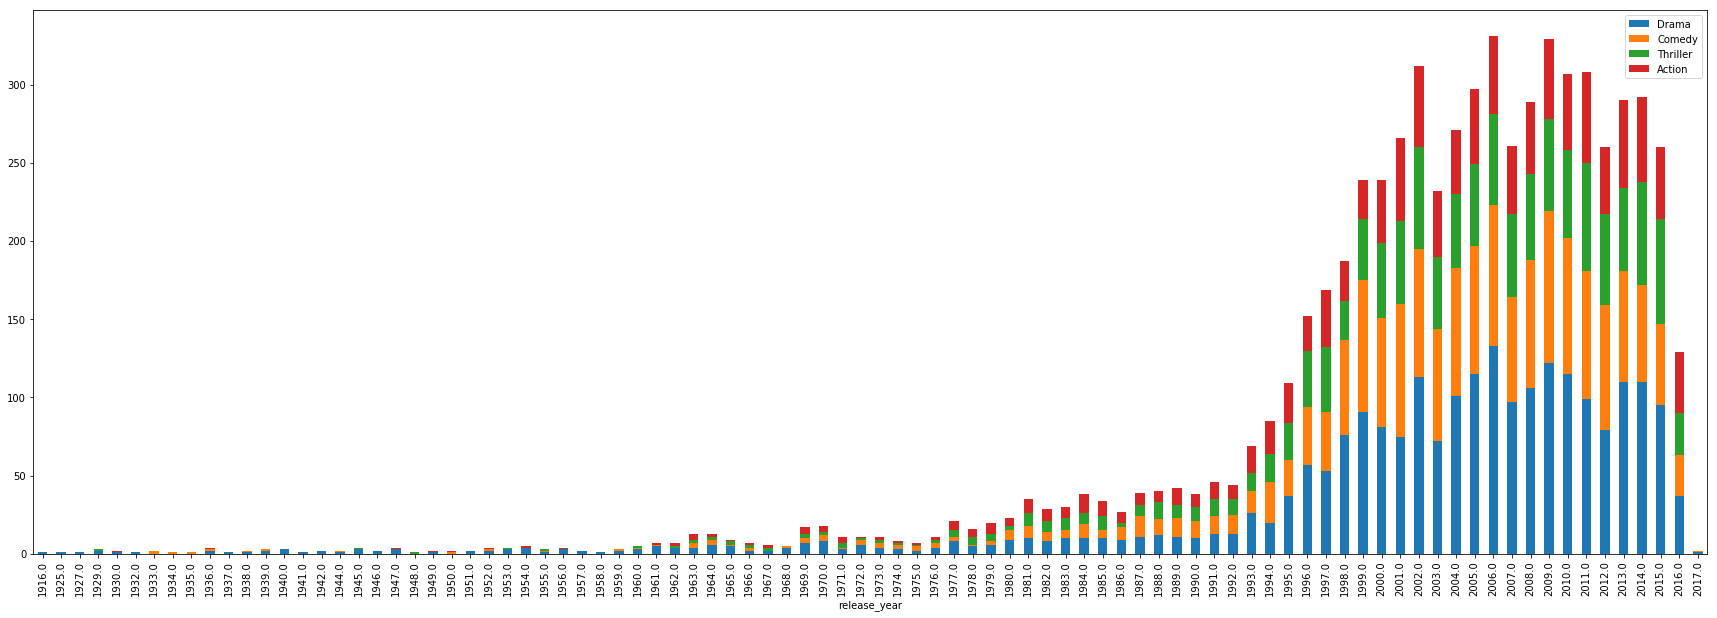

In [66]:
main_agg.plot.bar(stacked='true', figsize=(30,10))

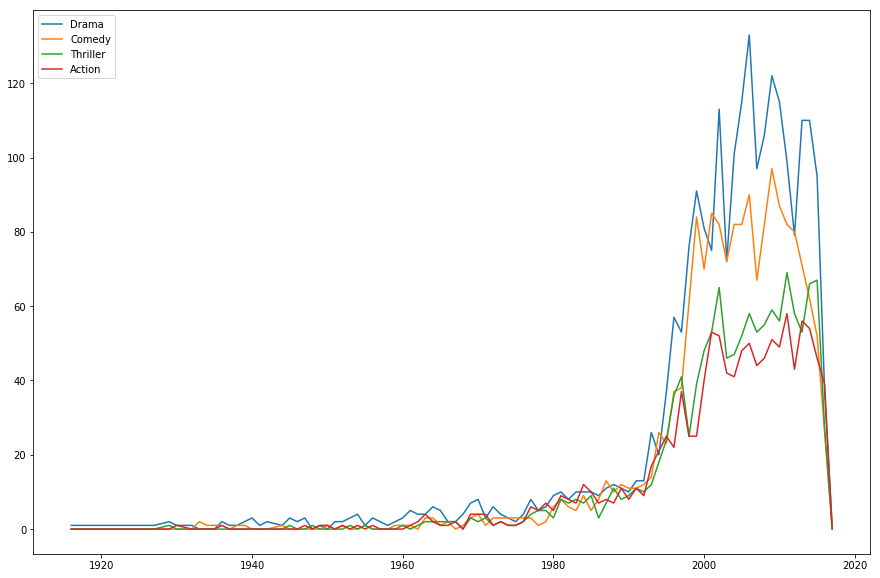

In [58]:
plt.figure(figsize=(15, 10))
plt.plot(genre_agg['Drama'])
plt.plot(genre_agg['Comedy'])
plt.plot(genre_agg['Thriller'])
plt.plot(genre_agg['Action'])
plt.legend(loc='upper left')
plt.show()

The frequency of each of the four most common genres has stayed relatively consistent to eachother in recent years.  The hierarchy of Drama, Comedy, Thriller, Action has largely stayed the same, with occasional surges for a genre in select years, but not a consistent reordering
Comedy surged to the most frequent genre in 1989, 1994 and 2001.
Action surged to the lead in 1987 and generally enjoyed a relative boost from the late 1970s through the 1980s overall, rating second most common genre.